In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
"""))

# 12. mnist CNN & DNN

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #dataset
import tensorflow.keras.utils as utils #one hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#1. dataset
width=28; height=28
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [ ]:
#정규화
X_train = X_train.reshape(60000,width*height).astype('float32') / 255.0
X_test = X_test.reshape(10000,width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

#라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
Y_train.shape, Y_val.shape, Y_test.shape

In [ ]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(X_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제"+str(np.argmax(Y_test[i])))

## DNN (다중 퍼셉트론)

In [ ]:
#1. dataset
width=28; height=28
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#정규화
X_train = X_train.reshape(60000,width*height).astype('float32') / 255.0
X_test = X_test.reshape(10000,width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

#라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

#2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation="relu"))#입력 784
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))#출력 10

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])

#4. 힉습시키기
early_stopping = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data = (X_val, Y_val), verbose=1, callbacks=[early_stopping])

#5. 모델 학습과정을 표시하고 평가
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'r', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'y', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc=2)
acc_ax.legend(loc=3)

#모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
#loss and accuracy
print(loss_and_metrics[0], loss_and_metrics[1])

In [ ]:
#7. 모델 사용하기
yhat = model.predict(X_test, batch_size=32)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(X_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제값: "+str(np.argmax(Y_test[i]))+" 예측값: "+str(np.argmax(yhat[i])))

In [ ]:
plt_row = 8
plt_col = 8
plt.rcParams['figure.figsize'] = (20,20)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

i=0
cnt=0
while cnt < (plt_row*plt_col):
    if np.argmax(Y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(X_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제값: "+str(np.argmax(Y_test[i]))+" 예측값: "+str(np.argmax(yhat[i])))
    i+=1
    cnt+=1

## CNN(컨볼루션 레이어)

Epoch 1/5
1563/1563 [==============================] - 20s 12ms/step - loss: 0.3309 - accuracy: 0.8962 - val_loss: 0.0512 - val_accuracy: 0.9841
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0400 - val_accuracy: 0.9906


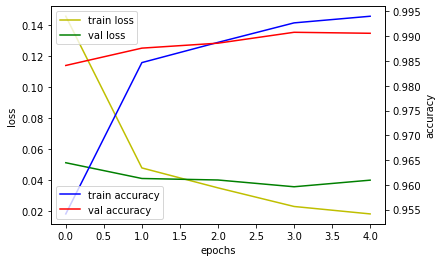

313/313 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.9905


loss: 0.0314798578619957 ,metrics["accuracy"]: 0.9904999732971191


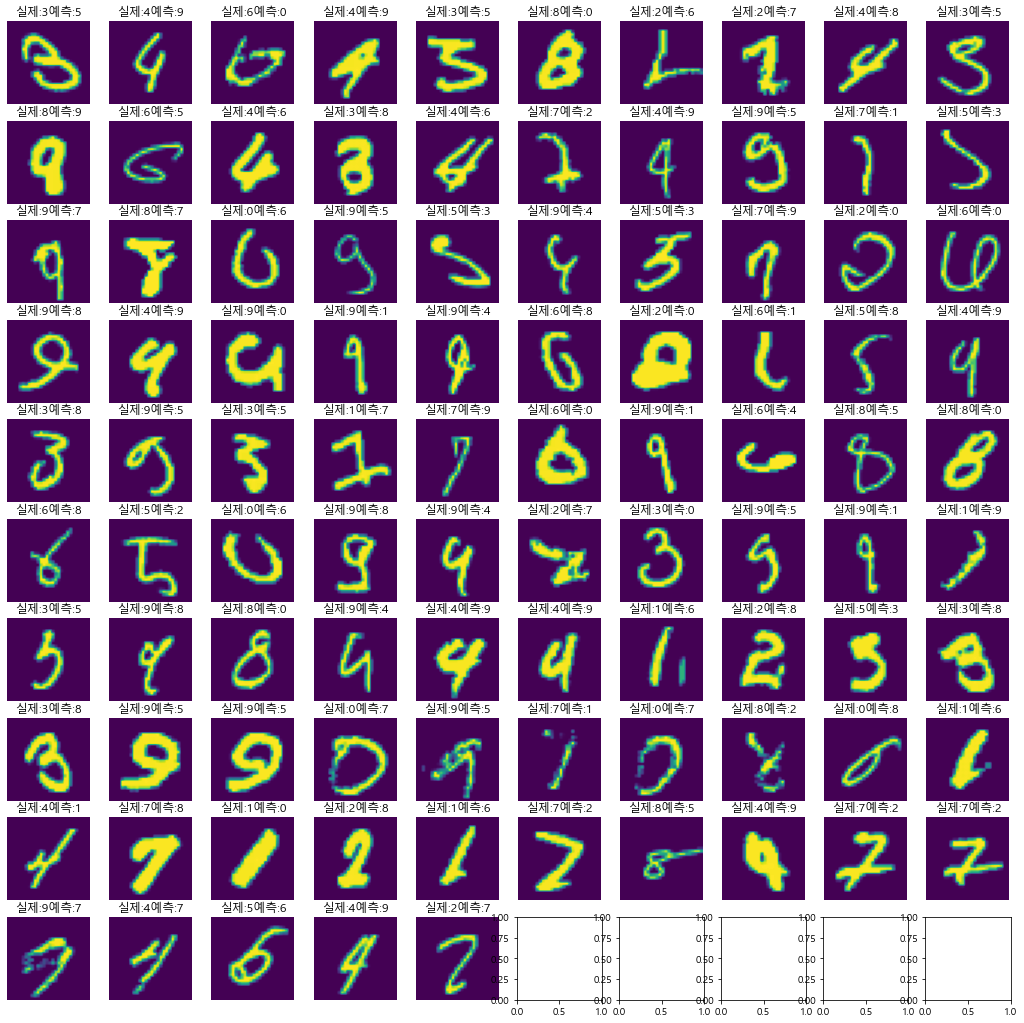

In [4]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

In [ ]:
# increase accuracy

Epoch 1/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3481 - accuracy: 0.8881 - val_loss: 0.0546 - val_accuracy: 0.9852
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0357 - val_accuracy: 0.9900
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0406 - val_accuracy: 0.9896
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0347 - val_accuracy: 0.9914
Epoch 5/5
1563/1563 [==============================] - 63s 41ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0399 - val_accuracy: 0.9908


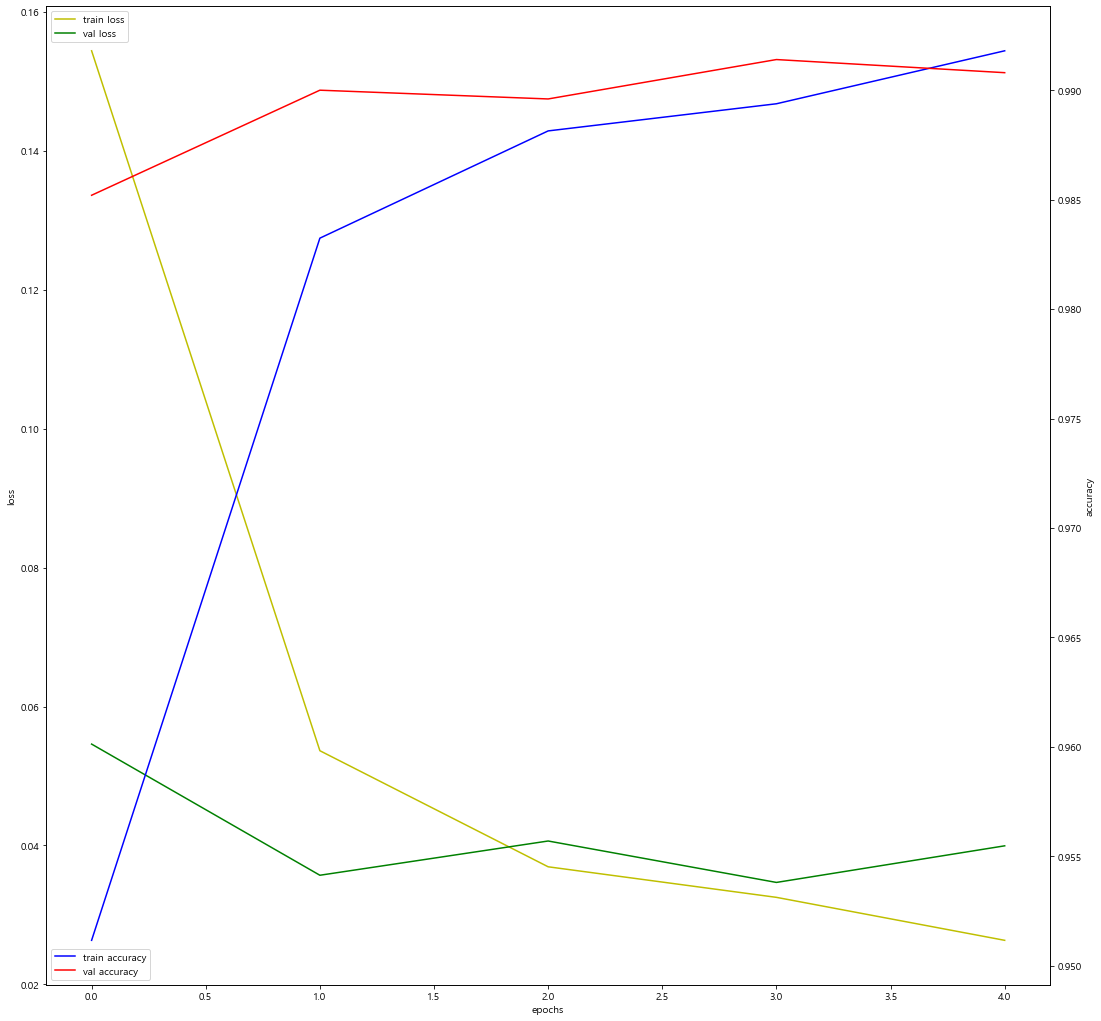

313/313 [==============================] - 2s 6ms/step - loss: 0.0262 - accuracy: 0.9930


loss: 0.026180889457464218 ,metrics["accuracy"]: 0.9929999709129333


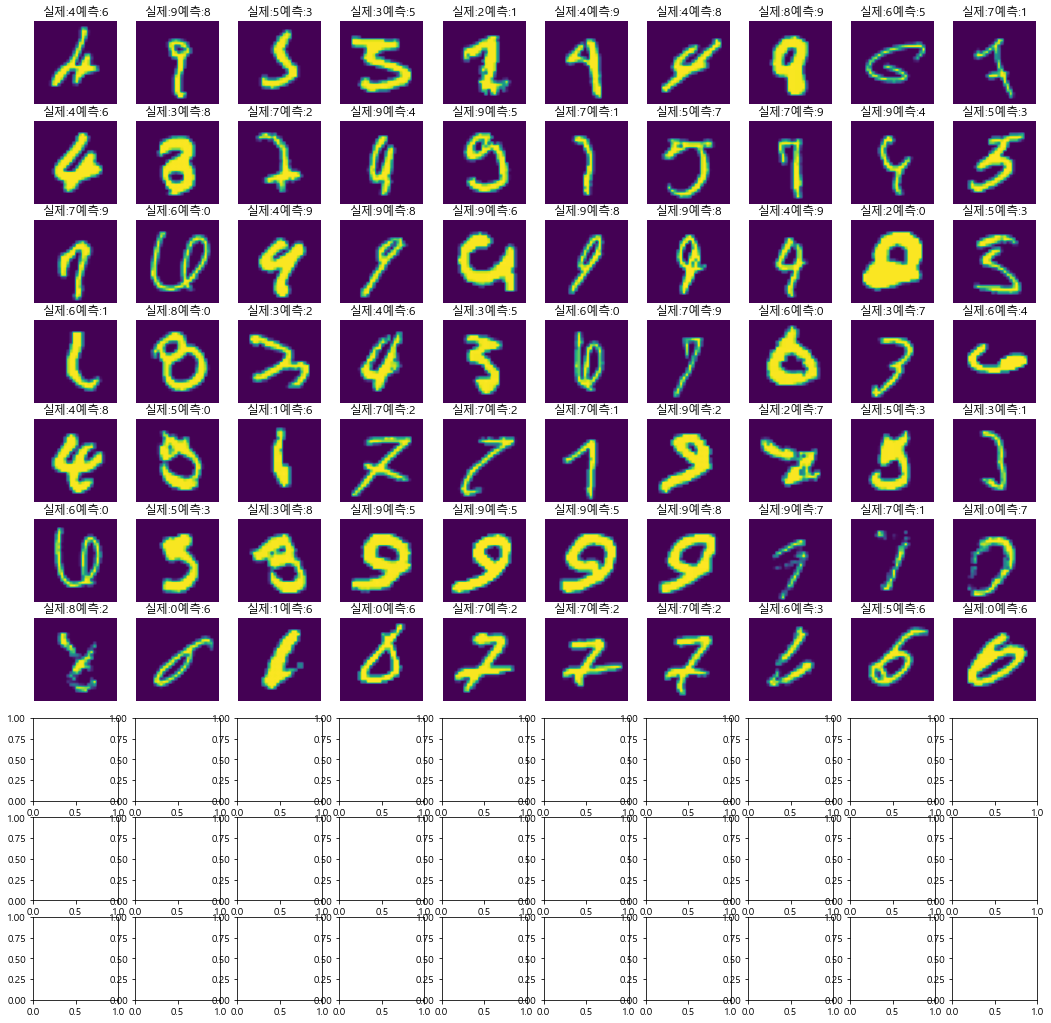

In [5]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])
# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1